In [ ]:
!pip install --upgrade -q kaggle

!mkdir /root/.kaggle
import json
token = {
    "username": "username",
    "key": "API KEY"
}

with open('/root/.kaggle/kaggle.json', 'w') as config_file:
    json.dump(token, config_file)
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d preetviradiya/covid19-radiography-dataset

 98% 735M/747M [00:08<00:00, 67.7MB/s]
100% 747M/747M [00:08<00:00, 92.0MB/s]


In [ ]:
import zipfile
zipref=zipfile.ZipFile("/content/covid19-radiography-dataset.zip",'r')
zipref.extractall()
zipref.close()

In [ ]:
import os
num_class=len(os.listdir("/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset"))
num_class

4

In [ ]:
!pip install split-folders
import splitfolders

splitfolders.ratio("/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset",output='data',seed=1337,ratio=(0.8,0.2))

Copying files: 21165 files [00:12, 1747.66 files/s]


In [ ]:
train_dir="/content/data/train/"
test_dir="/content/data/val/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/data/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names) 

['COVID' 'Lung_Opacity' 'Normal' 'Viral Pneumonia']


(299, 299)


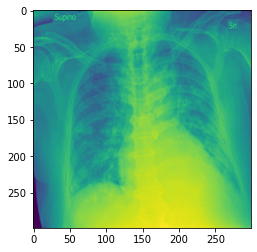

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

fpath=r'/content/data/train/COVID/COVID-10.png'
img=plt.imread(fpath)
print (img.shape)
imshow(img)

In [93]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir , target_class):

  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder) , 1)
  print(random_image)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"image shape : {img.shape}")

  return img

['COVID-3553.png']
image shape : (299, 299)


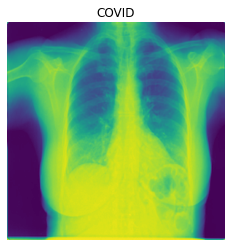

In [94]:
img = view_random_image(target_dir = "data/train/" , 
                        target_class = "COVID")

['Lung_Opacity-4567.png']
image shape : (299, 299)


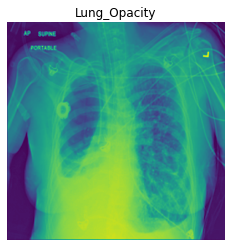

In [95]:
img = view_random_image(target_dir = "data/train/" , 
                        target_class = "Lung_Opacity")

['Normal-6847.png']
image shape : (299, 299)


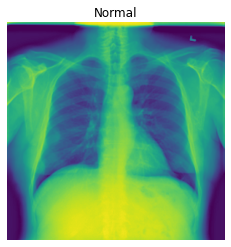

In [96]:
img = view_random_image(target_dir = "data/train/" , 
                        target_class = "Normal")

['Viral Pneumonia-21.png']
image shape : (299, 299)


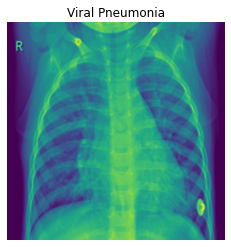

In [97]:
img = view_random_image(target_dir = "data/train/" , 
                        target_class = "Viral Pneumonia")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,
                                               class_mode='categorical',
                                               target_size=(180,180))

test_data = test_datagen.flow_from_directory(test_dir,batch_size=32,
                                               class_mode='categorical',
                                               target_size=(180,180))

Found 16930 images belonging to 4 classes.
Found 4235 images belonging to 4 classes.


In [ ]:
model1 = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(10,3,activation='relu',input_shape=(180,180,3)),
                              tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
                              tf.keras.layers.Conv2D(10,3,activation='relu'),
                              tf.keras.layers.MaxPool2D(),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(4,activation='softmax')
])

model1.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history1=model1.fit(train_data,epochs=15,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),
                    callbacks = [tf.keras.callbacks.ModelCheckpoint("classify_model1.h5", save_best_only=True, verbose = 1)])

Epoch 1/15
530/530 [==============================] - 51s 96ms/step - loss: 1.0076 - accuracy: 0.5829 - val_loss: 0.8119 - val_accuracy: 0.6907

Epoch 00001: val_loss improved from inf to 0.81189, saving model to classify_model1.h5
Epoch 2/15
530/530 [==============================] - 51s 96ms/step - loss: 0.7426 - accuracy: 0.7005 - val_loss: 0.7016 - val_accuracy: 0.7138

Epoch 00002: val_loss improved from 0.81189 to 0.70159, saving model to classify_model1.h5
Epoch 3/15
530/530 [==============================] - 51s 96ms/step - loss: 0.6595 - accuracy: 0.7383 - val_loss: 0.6241 - val_accuracy: 0.7528

Epoch 00003: val_loss improved from 0.70159 to 0.62406, saving model to classify_model1.h5
Epoch 4/15
530/530 [==============================] - 51s 96ms/step - loss: 0.6188 - accuracy: 0.7594 - val_loss: 0.5871 - val_accuracy: 0.7856

Epoch 00004: val_loss improved from 0.62406 to 0.58711, saving model to classify_model1.h5
Epoch 5/15
530/530 [==============================] - 51s 95

In [98]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 178, 178, 10)      280       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 89, 89, 10)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 87, 87, 10)        910       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 43, 43, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 18490)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 73964     
Total params: 75,154
Trainable params: 75,154
Non-trainable params: 0
__________________________________________________

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential
import tensorflow as tf

base_model=tf.keras.applications.InceptionV3(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=(180,180,3))
x=base_model(inputs)
x=layers.GlobalAveragePooling2D()(x)
outputs=layers.Dense(4,activation='softmax')(x)

model2=tf.keras.Model(inputs,outputs)


model2.compile(loss='categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history2=model2.fit(train_data,epochs=15,validation_data=test_data,validation_steps=int(len(test_data)),
                    callbacks = [tf.keras.callbacks.ModelCheckpoint("classify_model2.h5", save_best_only=True, verbose = 1)])

Epoch 1/15
530/530 [==============================] - 63s 111ms/step - loss: 1.0004 - accuracy: 0.6704 - val_loss: 0.6837 - val_accuracy: 0.7551

Epoch 00001: val_loss improved from inf to 0.68370, saving model to classify_model2.h5
Epoch 2/15
530/530 [==============================] - 58s 110ms/step - loss: 0.8021 - accuracy: 0.7398 - val_loss: 0.5237 - val_accuracy: 0.8116

Epoch 00002: val_loss improved from 0.68370 to 0.52374, saving model to classify_model2.h5
Epoch 3/15
530/530 [==============================] - 58s 109ms/step - loss: 0.6574 - accuracy: 0.7839 - val_loss: 0.8613 - val_accuracy: 0.7759

Epoch 00003: val_loss did not improve from 0.52374
Epoch 4/15
530/530 [==============================] - 58s 109ms/step - loss: 0.6893 - accuracy: 0.7765 - val_loss: 0.5857 - val_accuracy: 0.8090

Epoch 00004: val_loss did not improve from 0.52374
Epoch 5/15
530/530 [==============================] - 58s 110ms/step - loss: 0.6138 - accuracy: 0.7966 - val_loss: 0.5171 - val_accuracy

In [99]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 8196      
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(180, 180),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(180, 180),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(180, 180),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training images:
Found 16930 images belonging to 4 classes.
Non-augmented training images:
Found 16930 images belonging to 4 classes.
Unchanged test images:
Found 4235 images belonging to 4 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

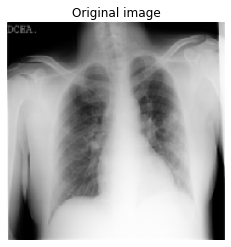

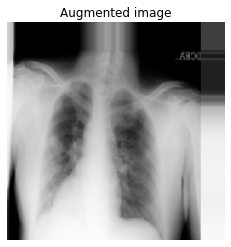

In [ ]:
# Show original image and augmented image
import random
import matplotlib.pyplot as plt

random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Create the model (same as model_5)
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
model3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(180, 180, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(4, activation='softmax')
])

# Compile the model
model3.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history3=model3.fit(train_data_augmented,epochs=15,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data),
                    callbacks = [tf.keras.callbacks.ModelCheckpoint("classify_model3.h5", save_best_only=True, verbose = 1)])

Epoch 1/15
530/530 [==============================] - 145s 272ms/step - loss: 1.2203 - accuracy: 0.4748 - val_loss: 1.1011 - val_accuracy: 0.5306

Epoch 00001: val_loss improved from inf to 1.10114, saving model to classify_model3.h5
Epoch 2/15
530/530 [==============================] - 146s 275ms/step - loss: 1.0976 - accuracy: 0.5115 - val_loss: 0.9698 - val_accuracy: 0.5521

Epoch 00002: val_loss improved from 1.10114 to 0.96975, saving model to classify_model3.h5
Epoch 3/15
530/530 [==============================] - 145s 274ms/step - loss: 1.0246 - accuracy: 0.5565 - val_loss: 0.9753 - val_accuracy: 0.5665

Epoch 00003: val_loss did not improve from 0.96975
Epoch 4/15
530/530 [==============================] - 146s 275ms/step - loss: 0.9804 - accuracy: 0.5783 - val_loss: 0.8739 - val_accuracy: 0.6375

Epoch 00004: val_loss improved from 0.96975 to 0.87391, saving model to classify_model3.h5
Epoch 5/15
530/530 [==============================] - 145s 273ms/step - loss: 0.9229 - accur

In [100]:
model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_219 (Conv2D)          (None, 178, 178, 10)      280       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 89, 89, 10)        0         
_________________________________________________________________
conv2d_220 (Conv2D)          (None, 87, 87, 10)        910       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 43, 43, 10)        0         
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 41, 41, 10)        910       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 20, 20, 10)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4000)            

In [ ]:
# Import the required modules for model creation
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Setup data augmentation
data_augmentation = Sequential([
  preprocessing.RandomFlip("horizontal"), # randomly flip images on horizontal edge
  preprocessing.RandomRotation(0.2), # randomly rotate images by a specific amount
  preprocessing.RandomHeight(0.2), # randomly adjust the height of an image by a specific amount
  preprocessing.RandomWidth(0.2), # randomly adjust the width of an image by a specific amount
  preprocessing.RandomZoom(0.2), # randomly zoom into an image
  # preprocessing.Rescaling(1./255) # keep for models like ResNet50V2, remove for EfficientNet
], name="data_augmentation")

In [ ]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.InceptionV3(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(180, 180, 3), name="input_layer") # shape of input image
x = data_augmentation(inputs) # augment images (only happens during training)
x = base_model(x, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(4, activation="softmax", name="output_layer")(x) # same number of outputs as classes
model4 = tf.keras.Model(inputs, outputs)

# Compile
model4.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

# Fit
history4 = model4.fit(train_data,
                                           epochs=15, # fit for 5 epochs to keep experiments quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # evaluate on smaller portion of test data
                                           callbacks = [tf.keras.callbacks.ModelCheckpoint("classify_model4.h5", save_best_only=True, verbose = 1)]) # save best model weights to file

Epoch 1/15
530/530 [==============================] - 155s 283ms/step - loss: 1.3094 - accuracy: 0.5957 - val_loss: 1.0244 - val_accuracy: 0.6908

Epoch 00001: val_loss improved from inf to 1.02440, saving model to classify_model4.h5
Epoch 2/15
530/530 [==============================] - 86s 163ms/step - loss: 0.9051 - accuracy: 0.6953 - val_loss: 0.7445 - val_accuracy: 0.7138

Epoch 00002: val_loss improved from 1.02440 to 0.74447, saving model to classify_model4.h5
Epoch 3/15
530/530 [==============================] - 73s 138ms/step - loss: 0.8915 - accuracy: 0.7026 - val_loss: 0.6549 - val_accuracy: 0.7549

Epoch 00003: val_loss improved from 0.74447 to 0.65488, saving model to classify_model4.h5
Epoch 4/15
530/530 [==============================] - 68s 129ms/step - loss: 0.8885 - accuracy: 0.7073 - val_loss: 1.2629 - val_accuracy: 0.5625

Epoch 00004: val_loss did not improve from 0.65488
Epoch 5/15
530/530 [==============================] - 60s 113ms/step - loss: 0.9008 - accuracy:

In [101]:
model4.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 180, 180, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling (Glob (None, 2048)              0         
_________________________________________________________________
output_layer (Dense)         (None, 4)                 8196      
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(180, 180, 3), name="input_layer") # shape of input image
x = base_model(inputs) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(4, activation="softmax", name="output_layer")(x) # same number of outputs as classes
model5 = tf.keras.Model(inputs, outputs)

# Compile
model5.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(), # use Adam with default settings
              metrics=["accuracy"])

# Fit
history5 = model5.fit(train_data,
                                           epochs=15, # fit for 5 epochs to keep experiments quick
                                           validation_data=test_data,
                                           validation_steps=int(0.15 * len(test_data)), # evaluate on smaller portion of test data
                                           callbacks = [tf.keras.callbacks.ModelCheckpoint("classify_model5.h5", save_best_only=True, verbose = 1)]) # save best model weights to file

94674944/94668760 [==============================] - 1s 0us/step
Epoch 1/15
530/530 [==============================] - 55s 97ms/step - loss: 0.6918 - accuracy: 0.7442 - val_loss: 0.4215 - val_accuracy: 0.8487

Epoch 00001: val_loss improved from inf to 0.42154, saving model to classify_model5.h5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
530/530 [==============================] - 50s 94ms/step - loss: 0.5062 - accuracy: 0.8159 - val_loss: 0.4475 - val_accuracy: 0.8273

Epoch 00002: val_loss did not improve from 0.42154
Epoch 3/15
530/530 [==============================] - 49s 93ms/step - loss: 0.4508 - accuracy: 0.8346 - val_loss: 0.3952 - val_accuracy: 0.8487

Epoch 00003: val_loss improved from 0.42154 to 0.39516, saving model to classify_model5.h5
Epoch 4/15
530/530 [==============================] - 51s 95ms/step - loss: 0.4165 - accuracy: 0.8447 - val_loss: 0.5075 - val_accuracy: 0.8289

Epoch 00004: val_loss did not improve from 0.39516
Epoch 5/15
530/530 [==============================] - 50s 95ms/step - loss: 0.3999 - accuracy: 0.8537 - val_loss: 0.4469 - val_accuracy: 0.8339

Epoch 00005: val_loss did not improve from 0.39516
Epoch 6/15
530/530 [==============================] - 51s 96ms/step - loss: 0.3738 - accuracy: 0.8621 - val_loss: 0.5083 - val_accuracy: 0.8076

Epoch 00006: val_loss did not i

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

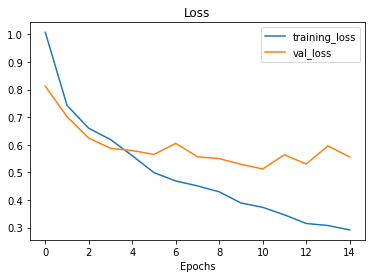

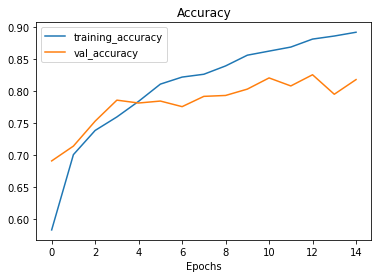

In [ ]:
plot_loss_curves(history1)

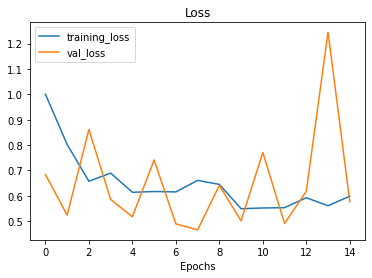

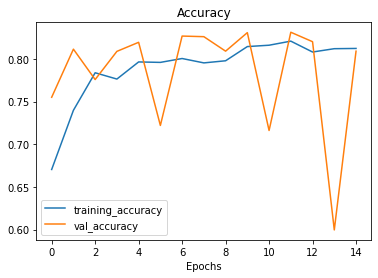

In [ ]:
plot_loss_curves(history2)

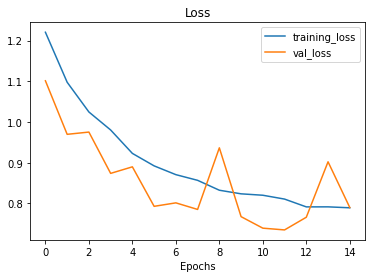

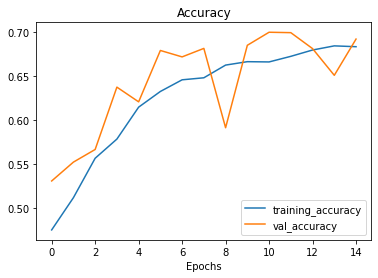

In [ ]:
plot_loss_curves(history3)

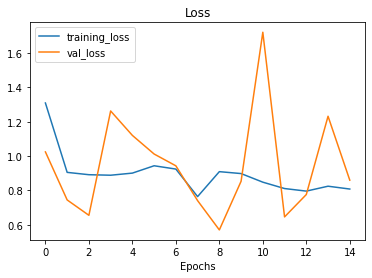

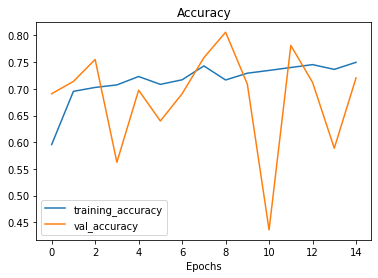

In [ ]:
plot_loss_curves(history4)

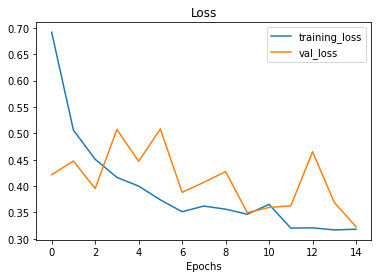

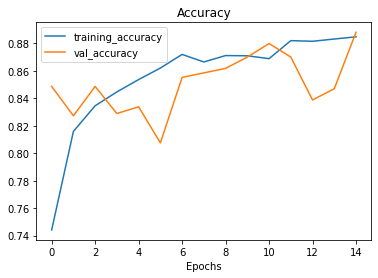

In [ ]:
plot_loss_curves(history5)

# **From the loss curves, we can observe that model5 performs the best with accuracy greater than 88%. So we will use that for predicting on some test images**

In [ ]:
base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

--2021-07-06 09:39:47--  https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-11.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41650 (41K) [image/png]
Saving to: ‘COVID-11.png.1’

COVID-11.png.1      100%[===================>]  40.67K  --.-KB/s    in 0.002s  

2021-07-06 09:39:47 (18.9 MB/s) - ‘COVID-11.png.1’ saved [41650/41650]



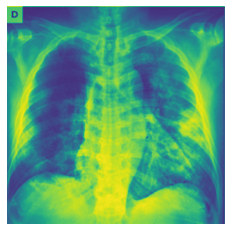

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-11.png
steak = mpimg.imread("COVID-11.png")
plt.imshow(steak)
plt.axis(False);

In [ ]:
def load_prep(filename,img_shape=180):

    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.resize(img,size=[img_shape,img_shape])

    img=img/255.
    return img

In [ ]:
classify=load_prep("COVID-11.png")
classify

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.8257117 , 0.8257117 , 0.8257117 ],
        [0.8265795 , 0.8265795 , 0.8265795 ],
        [0.8265795 , 0.8265795 , 0.8265795 ],
        ...,
        [0.5894118 , 0.5894118 , 0.5894118 ],
        [0.5842808 , 0.5842808 , 0.5842808 ],
        [0.6373917 , 0.6373917 , 0.6373917 ]],

       [[0.68783224, 0.68783224, 0.68783224],
        [0.6904575 , 0.6904575 , 0.6904575 ],
        [0.6904575 , 0.6904575 , 0.6904575 ],
        ...,
        [0.22421569, 0.22421569, 0.22421569],
        [0.21264674, 0.21264674, 0.21264674],
        [0.3107501 , 0.3107501 , 0.3107501 ]],

       [[0.6993355 , 0.6993355 , 0.6993355 ],
        [0.7019608 , 0.7019608 , 0.7019608 ],
        [0.7019608 , 0.7019608 , 0.7019608 ],
        ...,
        [0.26394337, 0.26394337, 0.26394337],
        [0.25230935, 0.25230935, 0.25230935],
        [0.34399658, 0.34399658, 0.34399658]],

       ...,

       [[0.418827  , 0.418827  , 0.418827  ],
        [0.40

In [ ]:
classify=tf.expand_dims(classify,axis=0)

In [ ]:
pred=model5.predict(classify)
pred

array([[0.87030256, 0.01471346, 0.00793173, 0.10705221]], dtype=float32)

In [ ]:
import numpy as np

result = pred.argmax()
class_names[result]

'COVID'

In [ ]:
def pred_and_plot(model, filename, class_names):
  import numpy as np
  img = load_prep(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  result=pred.argmax()
  pred_class = class_names[result]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

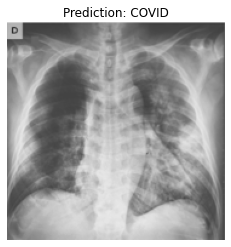

In [ ]:
pred_and_plot(model5, "COVID-11.png", class_names)

In [ ]:
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-1061.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-1140.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-1680.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Normal-100.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Normal-1004.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Normal-5267.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Normal-524.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Viral%20Pneumonia-1095.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Viral%20Pneumonia-1120.png
!wget https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/Viral%20Pneumonia-1148.png

--2021-07-06 09:53:03--  https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-1061.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40105 (39K) [image/png]
Saving to: ‘COVID-1061.png.1’

COVID-1061.png.1    100%[===================>]  39.17K  --.-KB/s    in 0.003s  

2021-07-06 09:53:03 (14.5 MB/s) - ‘COVID-1061.png.1’ saved [40105/40105]

--2021-07-06 09:53:04--  https://raw.githubusercontent.com/Zahid8/MLOps-for-Good-Hackathon/main/COVID-1140.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35233 (3

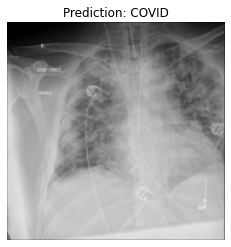

In [ ]:
pred_and_plot(model5, "COVID-1061.png", class_names)

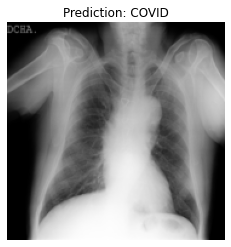

In [ ]:
pred_and_plot(model5, "COVID-1140.png", class_names)

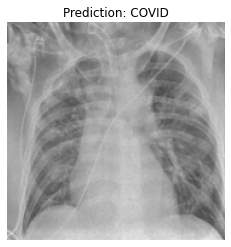

In [ ]:
pred_and_plot(model5, "COVID-1680.png", class_names)

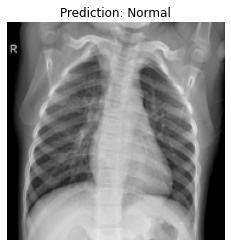

In [ ]:
pred_and_plot(model5, "Normal-100.png", class_names)

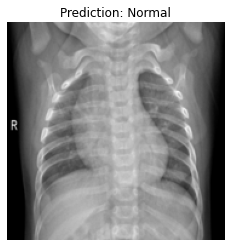

In [ ]:
pred_and_plot(model5, "Normal-1004.png", class_names)

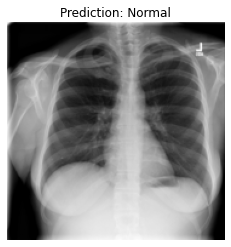

In [ ]:
pred_and_plot(model5,"Normal-5267.png.1", class_names)

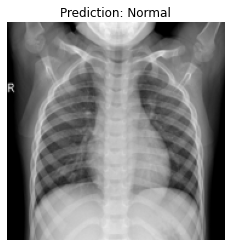

In [ ]:
pred_and_plot(model5,"Normal-524.png", class_names)

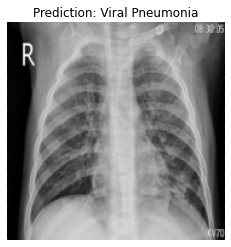

In [ ]:
pred_and_plot(model5, "Viral Pneumonia-1095.png", class_names)

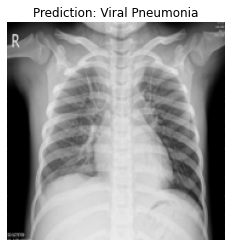

In [ ]:
pred_and_plot(model5, "Viral Pneumonia-1120.png", class_names)

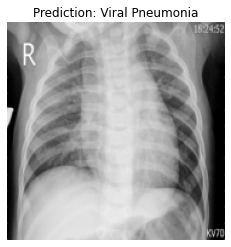

In [ ]:
pred_and_plot(model5, "Viral Pneumonia-1148.png", class_names)